In this notebook we explain how do we generate the volatility smile plot. 

At-the-money (ATM) options are the most liquid - we will look for the option with the strike price ($K$) closest to the forward value $F$, and treat this as the ATM option.

In an earlier notebook, we have covered how to compute implied volatility for a given option price.

Suppose $S=100$, $r=0.05$, $T=1.0$, and suppose the ATM volatility is $\sigma_{LN}=0.2$. Here the subscript "LN" stands for "lognormal".

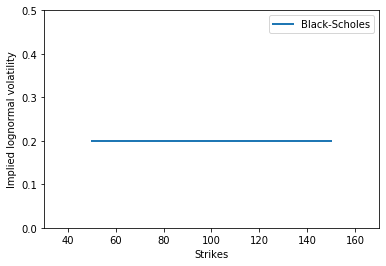

In [2]:
import pandas
import numpy as np
from scipy.stats import norm
from scipy.optimize import brentq
import matplotlib.pylab as plt


def BlackScholesCall(S, K, r, sigma, T):
    d1 = (np.log(S/K)+(r+sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    return S*norm.cdf(d1) - K*np.exp(-r*T)*norm.cdf(d2)


def impliedCallVolatility(S, K, r, price, T):
    impliedVol = brentq(lambda x: price -
                        BlackScholesCall(S, K, r, x, T),
                        1e-6, 1)

    return impliedVol


S = 100
r = 0.05
T = 1.0
sigma = 0.2
F = S*np.exp(r*T)
strikes = np.linspace(50, 150, 100)

summary = []
for K in strikes:
    price = BlackScholesCall(S, K, r, sigma, T)
    impliedvol = impliedCallVolatility(S, K, r, price, T)
    summary.append([K, impliedvol])

df = pandas.DataFrame(summary, columns=['strike', 'vol'])
df.set_index('strike', drop=True, inplace=True)
plt.plot(df['vol'], linewidth=2.0, label='Black-Scholes')
plt.axis([30, 170, 0, 0.5])
plt.legend()
plt.xlabel('Strikes')
plt.ylabel('Implied lognormal volatility')
plt.show()

In [3]:
price

0.3596298261529238

In [ ]:
#impliedCallVolatility(846.9, 860, 0, 553, 1.38)
impliedCallVolatility(S, K, r, price, T)

In [ ]:
today = dt.date(2013, 8, 30)
expiry = dt.date(2015, 1, 17)

T = (expiry-today).days/365.0
S = 846.9
r = f(T*365)/100
F = np.exp(r*T)*S

In [ ]:
impliedCallVolatility(100, 150,0.05, 0.20, T)

In [ ]:
price

Clearly, we get a flat surface, because we use the same lognormal volatility to price the options across all strikes. In other words, if the Black-Scholes' assumption that the stock price follows lognormal distribution with a constant variance, then we should expect the implied volatilities to be the same across all strikes.

For Bachelier model, suppose we use the model
\begin{equation*}
dS_t = \sigma_{N} S_0 dW_t 
\end{equation*}

Try to generate the implied volatility curve using Bachelier model.

In [ ]:
plt.plot(df['vol'], linewidth=2.0, label='Black-Scholes')